## PCA Exercise - Dimensionality reduction

We will test some of the dimensionality reduction techniques on sklearn's [Wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine).

_____________________
#### Part 1: Interpreting PCs

1. Load up the wine dataset and run a PCA over it. 
    - **Note:** Don't forget to scale your data and check for any missing values before running your PCA.


2. Extract the two best principal components (n_components=2). 

3. Create a 2D PCA Scatter Plot and colour code the different classes. Are there any clear separations of the various wine classes?

4. Create a loading plot with the two principal components. Identify which features influence PC-1 and which features influence PC-2. 

5. **Stretch** The combination of the previous two plots is called a PCA biplot. Create a PCA biplot.


In [1]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd

wine_data = load_wine()

train_data = np.array(wine_data.data)
train_labels = np.array(wine_data.target)

num_features = wine_data.data.shape[1]
unique_labels = np.unique(train_labels)
num_classes = len(unique_labels)

data = pd.DataFrame(data=np.c_[train_data, train_labels], columns=wine_data.feature_names + ['category'])

In [2]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,category
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [3]:
data['category'].unique()

array([0., 1., 2.])

In [4]:
data.isnull().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
category                        False
dtype: bool

In [5]:
features = wine_data.feature_names

In [6]:
from sklearn.preprocessing import StandardScaler

x = data.loc[:, features].values
x= StandardScaler().fit_transform(x) #normalize features

#normalize fetaure into pandas
#feat_cols = ['feature' + str(i) for i in range(x.shape[1])]
norm_wine = pd.DataFrame(x, columns=features)
norm_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [9]:
print(pca_wine.components_)

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


In [8]:
from sklearn.decomposition import PCA
pca_wine = PCA(n_components=2)
com_wine = pca_wine.fit_transform(norm_wine)

#create new data frame
principal_wine =pd.DataFrame(data = com_wine, columns = ['princom1', 'princom2'])
principal_wine

,princom1,princom2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


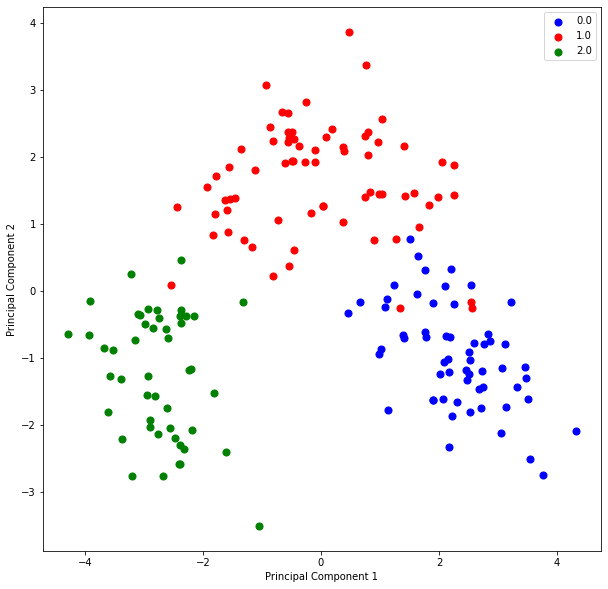

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
targets = [0.0,1.0,2.0]
colors = ['b','r','g']
for target, color in zip(targets,colors):
    indicesToKeep = data['category'] == target
    plt.scatter(principal_wine.loc[indicesToKeep, 'princom1'],
                principal_wine.loc[indicesToKeep, 'princom2'],
                c = color, s = 50)

plt.legend(targets)

Create a loading plot with the two principal components. Identify which features influence PC-1 and which features influence PC-2.

Stretch The combination of the previous two plots is called a PCA biplot. Create a PCA biplot.

In [11]:
pca_wine = PCA(n_components=2)
comp = pca_wine.fit(norm_wine)
pca_array = np.array(pca_wine.components_)
pca_array

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

In [12]:
column = ['Feature_%i' % i for i in range(13)]
loading_data = pd.DataFrame(data = pca_array, columns = column, index=['PC1','PC2'])
loading_data

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903


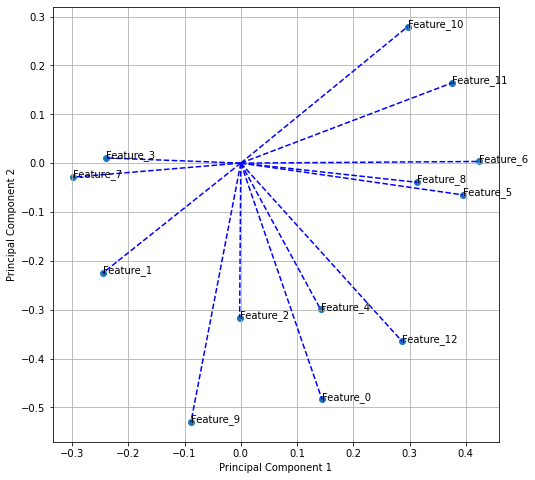

In [13]:
x = loading_data.iloc[0]
y = loading_data.iloc[1]
labs = loading_data.columns.tolist()

plt.figure(figsize=(8,8))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter(x, y)
plt.grid()
#add annotations
for i, label in enumerate(labs):
    plt.annotate(label, (x[i], y[i]))
    #add lines
    plt.plot([0,x[i]], [0, y[i]], color="blue", ls='--')
plt.show()

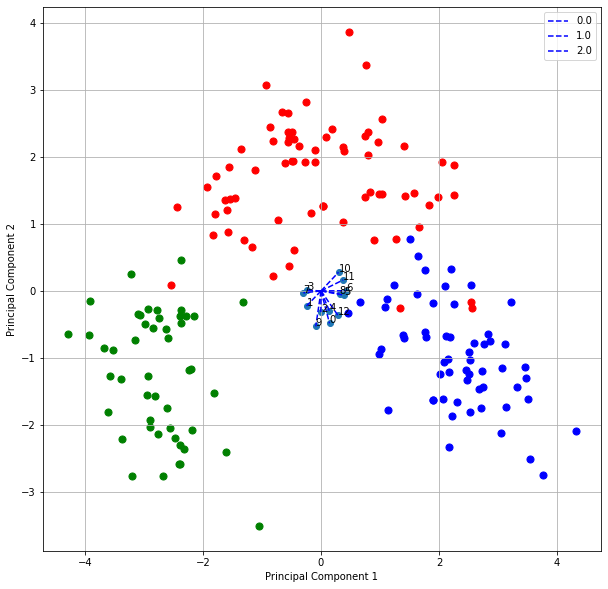

In [20]:
#biplot

plt.figure(figsize=(10,10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
targets = [0.0,1.0,2.0]
colors = ['b','r','g']
for target, color in zip(targets,colors):
    indicesToKeep = data['category'] == target
    plt.scatter(principal_wine.loc[indicesToKeep, 'princom1'],
                principal_wine.loc[indicesToKeep, 'princom2'],
                c = color, s = 50)

labs = ['0','1','2','3','4','5','6','7','8','9','10','11','12']
plt.scatter(x, y)
for i, label in enumerate(labs):
    plt.annotate(label, (x[i], y[i]))
    plt.plot([0,x[i]], [0, y[i]], color="blue", ls='--')
plt.legend(targets)

_____________________
#### Part 2: PCA in practice
    
1. Plot a scree plot to determine the number of principal components you want to keep. Use the elbow rule.

2. Create a cumulative explained_variance_ratio plot. Determine the number of principal components you want to keep. Use the elbow rule. 

3. Refit your PCA with the chosen optimal number of principal components and project the principal components to a DataFrame. Also, you should name the columns of the DataFrame appropriately. 

4. Export the data with the new features to a CSV file. The number of rows should be the same as in the original dataset.

In [61]:
#redo pca on all components
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [65]:
#find ratio of variance for each component
len(pca.explained_variance_ratio_)

13

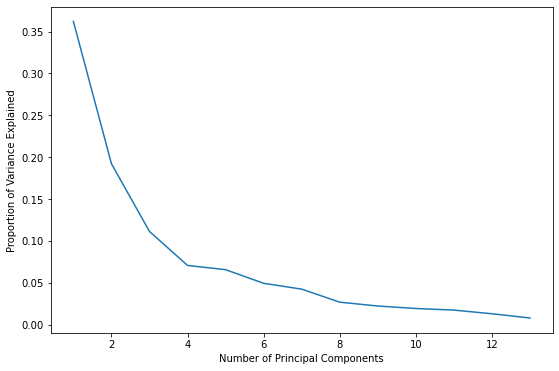

In [66]:
#scree plot
plt.figure(figsize=(9,6))
plt.plot(range(1,14),pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

We see a diminishing at 8 components

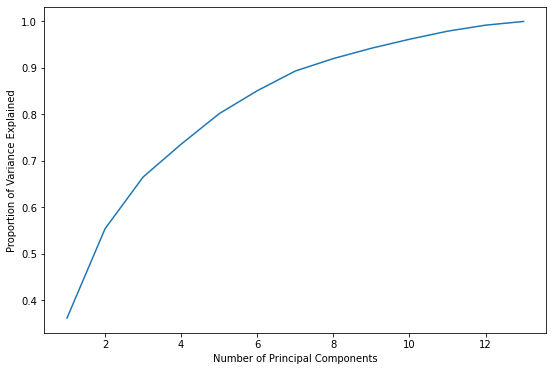

In [67]:
#culmulative sum plot
plt.figure(figsize=(9,6))
plt.plot(range(1,14),pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

80% we are looking at roughly 6 components

90% we are looking at roughly 8 components

In [93]:
#Refit your PCA with the chosen optimal number of principal components and project the principal components to a 
    #DataFrame. Also, you should name the columns of the DataFrame appropriately.
# normalize data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(data),columns = data.columns) 

from sklearn.decomposition import PCA
pca_wine_8 = PCA(n_components=8)
com_wine_8 = pca_wine_8.fit_transform(data_scaled)

#create new data frame
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']
new_wine_data =pd.DataFrame(com_wine_8,columns=labels)
new_wine_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937
...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512


In [95]:
new_wine_data.to_csv('PC8_wine.csv')

_________________________
#### Part 3: Stretch Activities (Optional)

1. Plot a variable correlation plot. 

    - **Hint:** We can create a scatter plot with 1st component on the x-axis and the second component on y-axis. 
    - **Hint:** The length of each component is equal to the number of columns (features) we have in our data before PCA. Points in the graph that are close to each other are similar features. We need to annotate the points with feature names.